<a href="https://colab.research.google.com/github/chandinig777/Classicmodels-Dashboard-PowerBi/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Employee Salary Prediction Using Machine Learning

In today's competitive business environment, accurately predicting employee salary based on performance and business metrics has become crucial. Organizations rely on such insights for workforce planning, talent retention, and performance evaluations.
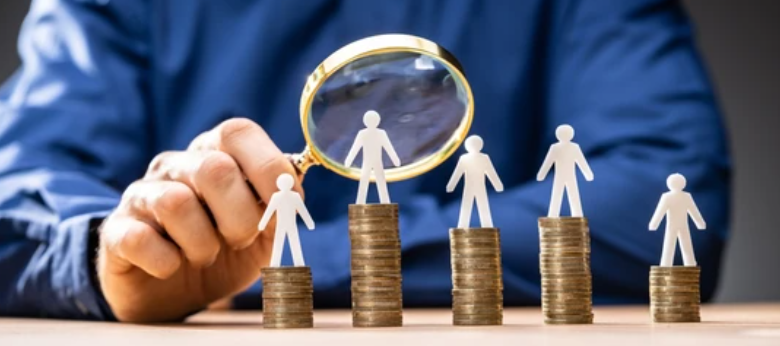

- In this project, we aim to build a predictive model that estimates an employee’s Salary based on various features such as:

  - Total Sales

  - Bonus

  - Base Pay

  - Unit Price

  - Volume

  - Months Worked

  -  other important business indicators.

- GOAL : is to create a robust and interpretable machine learning model that not only achieves high accuracy but also provides insights into the factors affecting salary determination.

## Objective:
### Predict employee Salary based on business and performance metrics.

 # Techniques Used
- Exploratory Data Analysis (EDA): Understand data distribution and outliers.

- Feature Engineering: Handling multicollinearity, scaling features, selecting top predictors.

- Model Building: Training multiple machine learning models.

- Model Evaluation: Using metrics like R² Score, MSE, MAE.

- Hyperparameter Tuning: Optimizing models with GridSearchCV.

- Model Interpretation: Explaining predictions using SHAP values and Feature Importance plots.

### Importing all the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/HR_data.csv"
df = pd.read_csv(path)
df.head(5)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [ ]:
df.shape

(5000, 20)

- Shape of the dataset is 5000 rows and 20 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

- By using info() we can see there are objects,floats and integers

In [ ]:
df.duplicated().sum()

np.int64(0)

- No duplicate values in the dataset

# Data Preprocessing

### Checking Null Values

In [ ]:
df.isnull().sum()

,0
Gender,0
Business,0
Dependancies,0
Calls,0
Type,0
Billing,0
Rating,0
Age,0
Salary,0
Base_pay,23


▶  By using isnull() we can check null values

- Base_pay is having 23 null values

- openingbalance is having 1476 null values

- Total_Sales are having 8 null values

## Missing value imputation


In [ ]:
df['Base_pay'] = df['Base_pay'].fillna(df['Base_pay'].median())

In [ ]:
#filling the null values
df[df['Total_Sales'].astype(str).str.strip() == ' ']
df['Total_Sales'] = df['Total_Sales'].replace(r'^\s*$', np.nan, regex=True)
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], errors='coerce')
df['Total_Sales'].fillna(df['Total_Sales'].median(), inplace=True)

- In Total_Sales there are some missing values including space like " ".
- So i removed the space and converted to integer

In [ ]:
df['openingbalance'].fillna(df['openingbalance'].median(), inplace= True)

Checking again Null values are present or not

In [ ]:
df.isnull().sum()

,0
Gender,0
Business,0
Dependancies,0
Calls,0
Type,0
Billing,0
Rating,0
Age,0
Salary,0
Base_pay,0


- There are No Null Values present

In [ ]:
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40047.272517,4991.096428,51.258522,6.761260e+06,40.733263,43.577828,43.034129,64.84151,2269.56846,32.18480
std,0.366643,8.560691,25376.961744,10112.355045,1268.848087,52.244022,1.620476e+07,32.578853,37.148512,36.760641,30.13968,2264.62695,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,18.80000,0.00000
25%,0.000000,47.000000,83890.338980,33744.021630,4194.516950,25.727500,1.283850e+06,26.397633,21.990000,21.718750,35.50000,389.21250,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,1395.65000,28.00000
75%,0.000000,57.000000,116912.092475,46764.836975,5845.604624,58.715000,6.247100e+06,42.525000,51.117500,50.415000,89.95000,3722.33750,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,8684.80000,72.00000


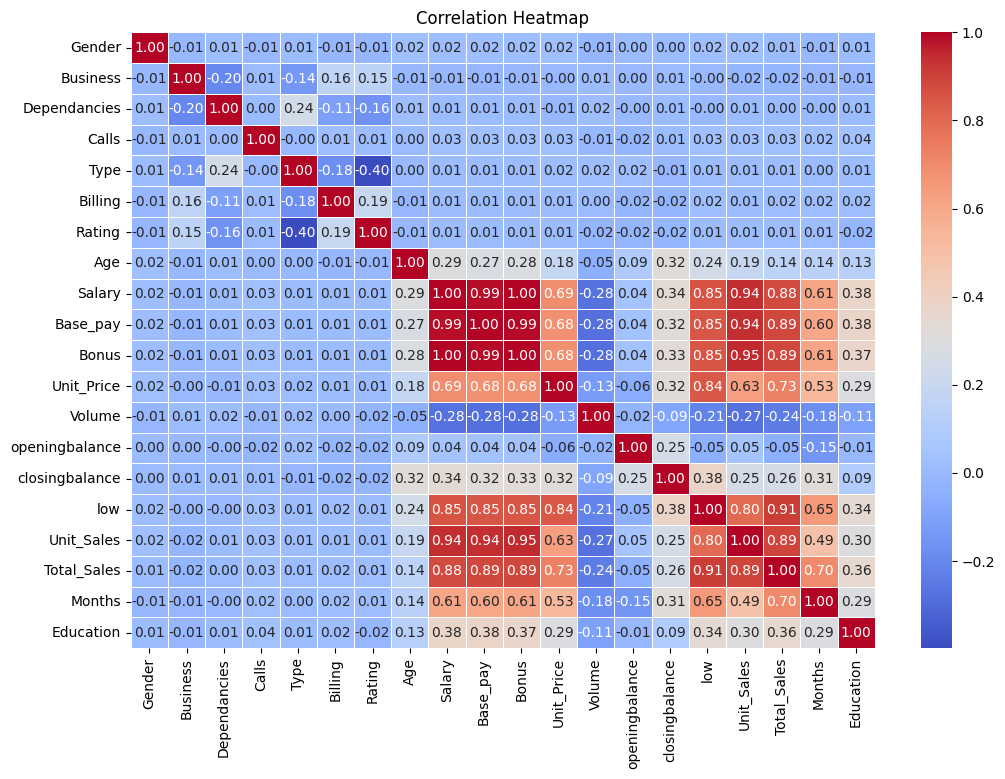

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your features are in a dataframe called 'df'
plt.figure(figsize=(12,8))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


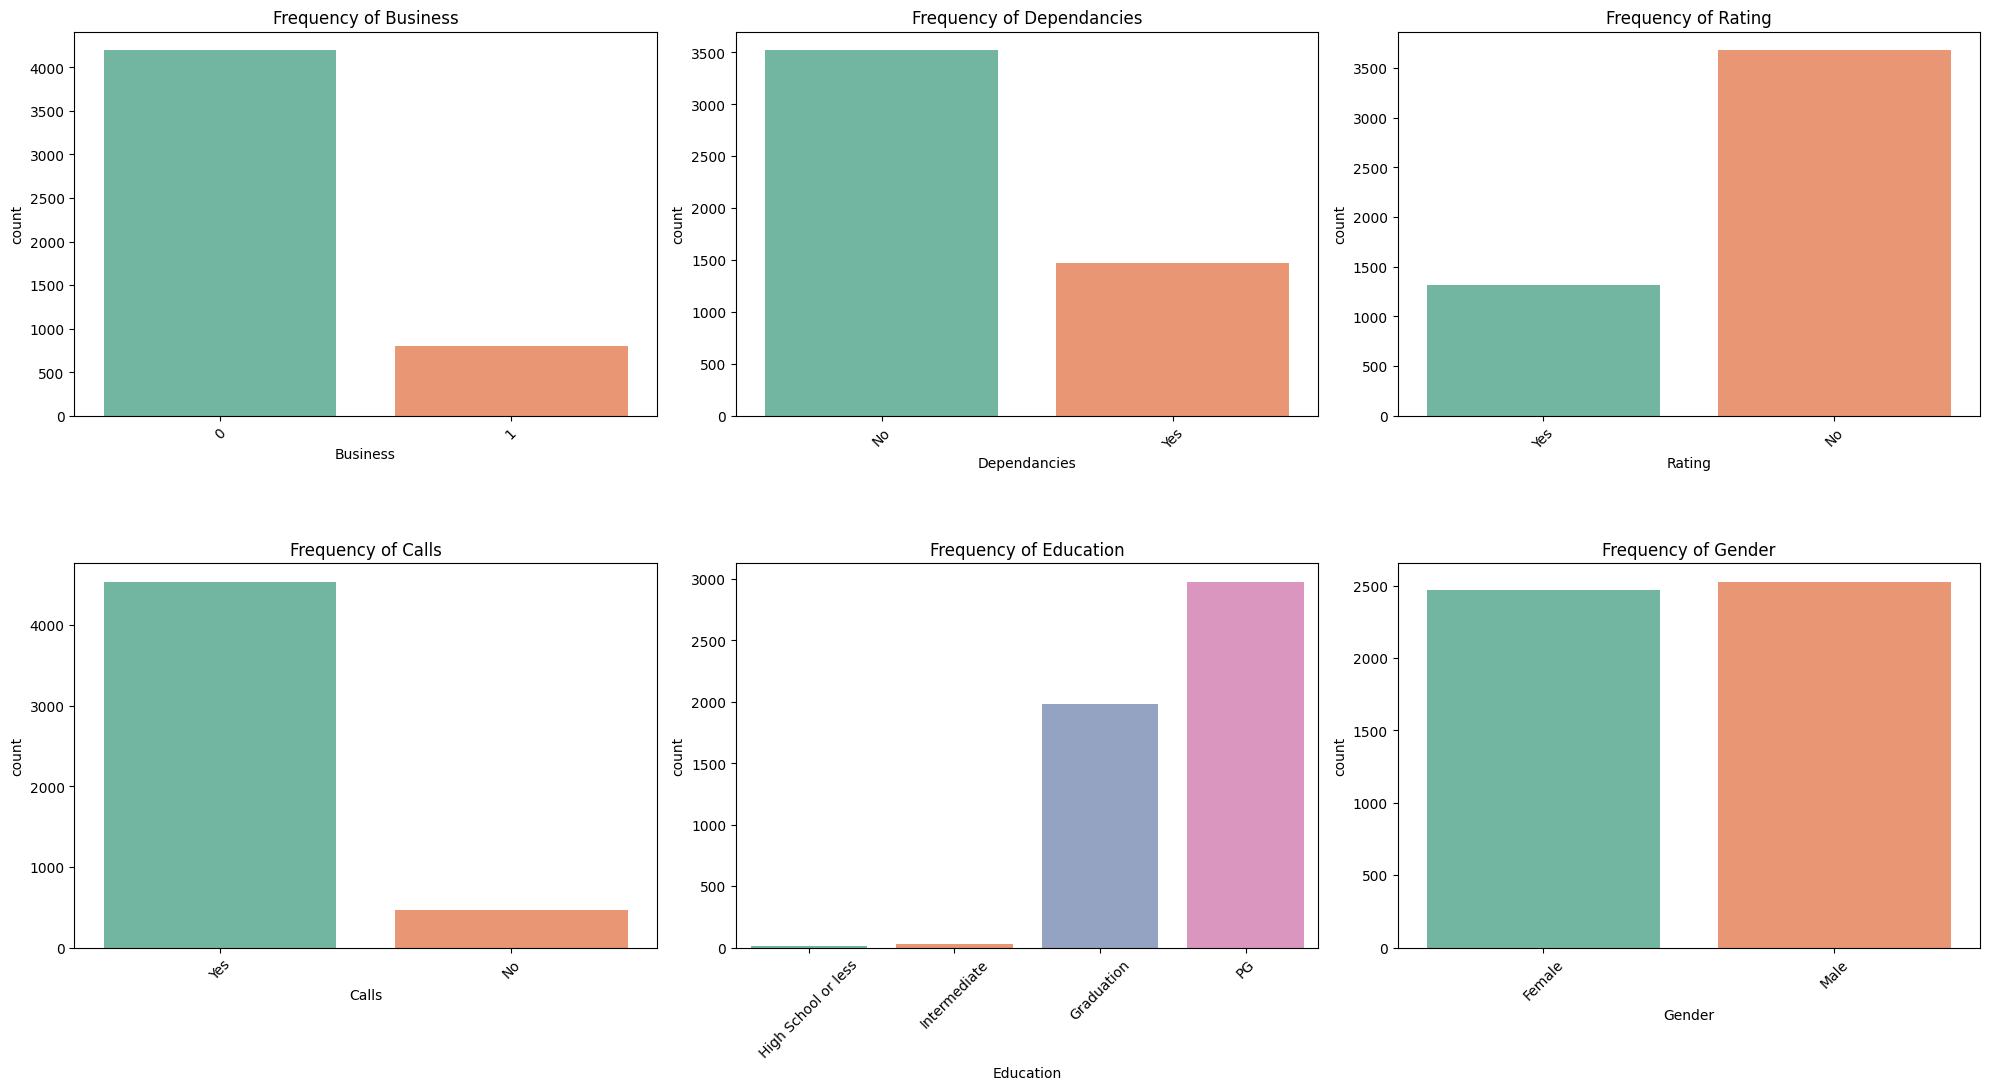

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of your categorical columns
categorical_cols = ['Business', 'Dependancies', 'Rating', 'Calls', 'Education', 'Gender']

# Set up the figure
plt.figure(figsize=(20, 15))  # Adjust the size as needed

# Loop through and create subplots
for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, idx)  # 3 rows, 3 columns (adjust based on number of columns)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


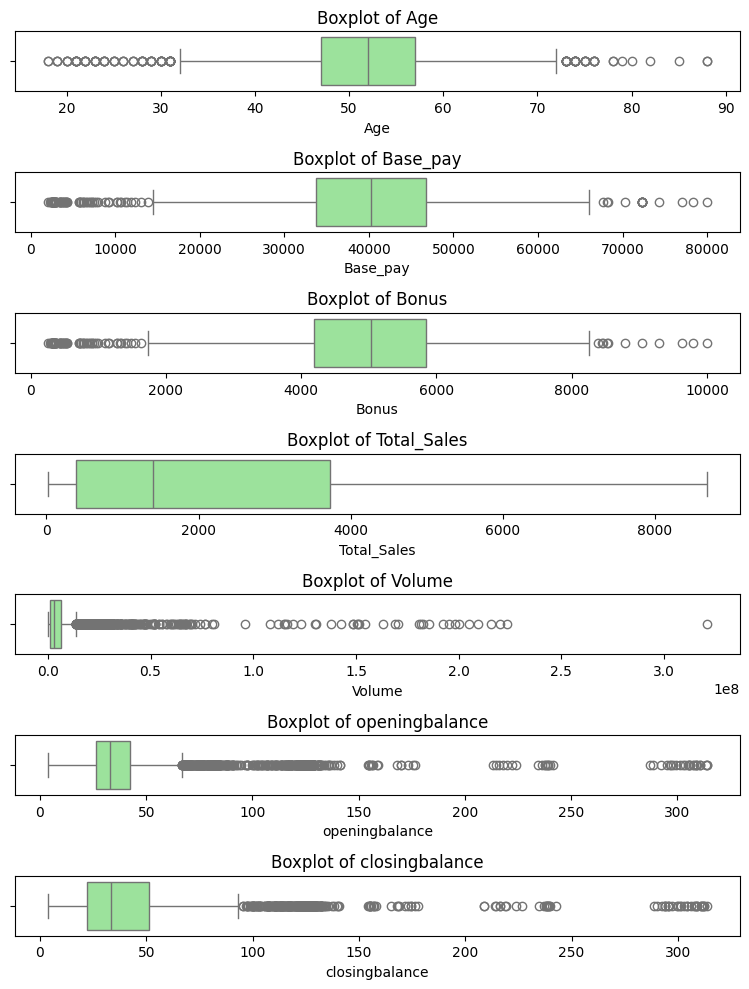

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['Age', 'Base_pay', 'Bonus', 'Total_Sales', 'Volume', 'openingbalance', 'closingbalance']

# Set up the figure
plt.figure(figsize=(15, 10))

for idx, col in enumerate(numerical_cols):
  # Boxplot
    plt.subplot(len(numerical_cols), 2, idx*2 + 2)
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


- Most features have outliers.


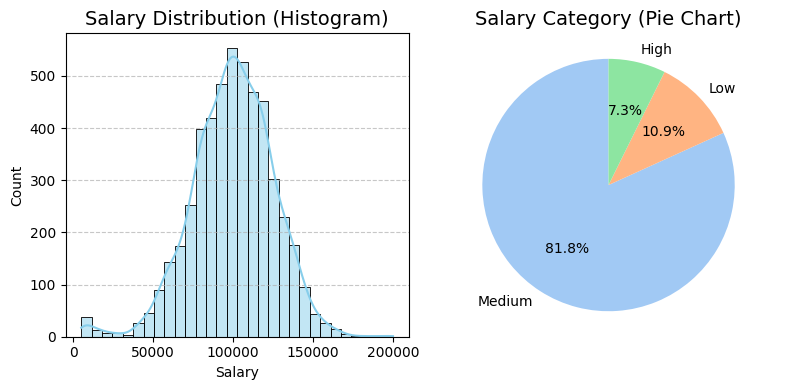

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

# Histogram
sns.histplot(df['Salary'], bins=30, kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Salary Distribution (Histogram)', fontsize=14)
ax[0].set_xlabel('Salary')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Pie chart
salary_bins = pd.cut(df['Salary'], bins=3, labels=['Low', 'Medium', 'High'])
salary_cat = salary_bins.value_counts()

ax[1].pie(salary_cat, labels=salary_cat.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax[1].set_title('Salary Category (Pie Chart)', fontsize=14)
ax[1].axis('equal')

plt.tight_layout()
plt.show()


observation:
- Salary follows a normal distribution (centered around ~100,000).
-  Most employees earn between 75,000–125,000.
- 81.8% employees are in the Medium salary category.
- Very few are in Low (10.9%) and High (7.3%) groups.

# Encoding the categorical variables
- LabelEncoder
- Manual encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create encoder instance
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Rating'] = le.fit_transform(df['Rating'])
df['Calls'] = le.fit_transform(df['Calls'])
df['Billing'] = le.fit_transform(df['Billing'])
df['Dependancies'] = le.fit_transform(df['Dependancies'])
df['Type'] = le.fit_transform(df['Type'])

In [ ]:
education_map = {
    'High School or less': 0,
    "Intermediate": 1,
    "Graduation": 2,
    'PG': 3
}

# Apply the mapping
df['Education'] = df['Education'].map(education_map)

# Check the results
print(df['Education'].head())

0    0
1    0
2    0
3    0
4    0
Name: Education, dtype: int64


## Checking Outliers
- using IQR (Interquartile Range) for outlier detection

In [ ]:
import numpy as np
import pandas as pd

# Assuming df is your dataset
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop over each numeric column
for col in num_cols:
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                 # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Feature: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print("-"*40)


Feature: Gender
Number of outliers: 0
----------------------------------------
Feature: Business
Number of outliers: 800
----------------------------------------
Feature: Dependancies
Number of outliers: 0
----------------------------------------
Feature: Calls
Number of outliers: 461
----------------------------------------
Feature: Type
Number of outliers: 0
----------------------------------------
Feature: Billing
Number of outliers: 0
----------------------------------------
Feature: Rating
Number of outliers: 0
----------------------------------------
Feature: Age
Number of outliers: 115
----------------------------------------
Feature: Salary
Number of outliers: 77
----------------------------------------
Feature: Base_pay
Number of outliers: 83
----------------------------------------
Feature: Bonus
Number of outliers: 77
----------------------------------------
Feature: Unit_Price
Number of outliers: 411
----------------------------------------
Feature: Volume
Number of outlier

- In this we can observe Business , call, volume,openingbalance,closing balance,low are having High outliers.
- Total Outlier Count in Dataset: 3796


## Treating Outliers
- Used Winsoriztion Method

In [ ]:
num_cols = ['Business', 'Age', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
            'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months']
for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] < lower, lower,
               np.where(df[col] > upper, upper, df[col]))

- As the dataset is having more than 50% data as outliers.so we cannot remove
- Instead of removing outliers, we replace them with a fixed percentile value.
- This method treat outliers by limiting the extreme values to reduce their effect on the model.

In [ ]:
import scipy.stats as stats
import numpy as np

# Let's split data into High Sales and Low Sales
threshold = df['Total_Sales'].median()  # you can also pick custom threshold
high_sales = df[df['Total_Sales'] >= threshold]['Salary']
low_sales = df[df['Total_Sales'] < threshold]['Salary']

# t-test
t_stat, p_value = stats.ttest_ind(high_sales, low_sales)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Decision
if p_value < 0.05:
    print("Reject Null Hypothesis: Total Sales significantly affects Salary")
else:
    print("Fail to Reject Null Hypothesis: No significant effect of Total Sales")


T-statistic: 85.98356280226227
P-value: 0.0
Reject Null Hypothesis: Total Sales significantly affects Salary


In [ ]:
from scipy.stats import f_oneway

# Categorical columns you want to test
categorical_features = ['Age','Business', 'Dependancies', 'Rating', 'Calls','Education','Gender','Months']

# Loop through each categorical feature
for feature in categorical_features:
    print(f"----- ANOVA for {feature} -----")

    groups = []

    for category in df[feature].dropna().unique():  # Drop NaN values if any
        group = df[df[feature] == category]['Salary']
        groups.append(group)

    # Perform ANOVA
    f_stat, p_val = f_oneway(*groups)

    print(f"F-Statistic: {f_stat}")
    print(f"P-Value: {p_val}\n")


----- ANOVA for Age -----
F-Statistic: 12.266490213476079
P-Value: 8.321649330601055e-80

----- ANOVA for Business -----
F-Statistic: 0.34710360934296747
P-Value: 0.5557839309490289

----- ANOVA for Dependancies -----
F-Statistic: 0.19682130121402344
P-Value: 0.6573181316003175

----- ANOVA for Rating -----
F-Statistic: 0.3291725469627125
P-Value: 0.5661725447630017

----- ANOVA for Calls -----
F-Statistic: 4.6219192331353565
P-Value: 0.03161374328462439

----- ANOVA for Education -----
F-Statistic: 383.34522170874686
P-Value: 4.325943392621942e-224

----- ANOVA for Gender -----
F-Statistic: 2.381839933726647
P-Value: 0.12281620257039723

----- ANOVA for Months -----
F-Statistic: 45.66747617190539
P-Value: 0.0



Observation:

Important Features affecting Salary (p-value < 0.05):

- Age,Calls,Education,Months

Less Important Features (p-value > 0.05):

- Business,Dependancies,Rating,Gender



##Assigning the Features:

- Independent Features for X variable
- Dependent Feature for Y variable

In [ ]:
X = df[['Total_Sales','Bonus','Base_pay','Unit_Price', 'Months','Volume','low']]
y = df['Salary']


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor # Importing the missing function

X = df[['Total_Sales','Bonus','Base_pay','Unit_Price', 'Months','Volume','low']]
y = df['Salary']

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the result
print(vif_data)

       Feature         VIF
0  Total_Sales   13.292173
1        Bonus  901.284654
2     Base_pay  891.662937
3   Unit_Price    9.513759
4       Months    5.217310
5       Volume    1.413792
6          low   26.931302


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Splitting the Dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

checking the shape of X_train,X_test,y_train,y_test

In [ ]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((4000, 7), (1000, 7), (4000,), (1000,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Check Before and After Scaling the data

Text(0.5, 1.0, 'X_train after scaling')

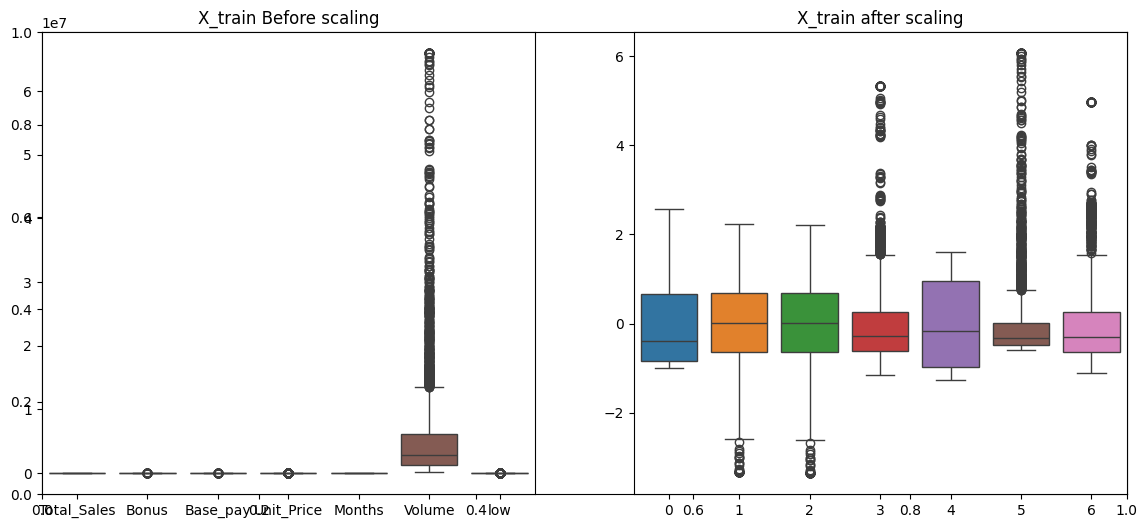

In [ ]:
# boxplots to understand scaler
plt.subplots(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_Scaled)
plt.title('X_train after scaling')

Observation:

Before Scaling :

- Features have different scales.

- Volume is very large compared to Bonus, Months, etc.

- Model training would be biased toward bigger numbers.

After Scaling (Right plot):

- All features are centered around 0 and have similar range.

- Fair comparison between features.

- Better model performance and faster training.

# Linear Regression

In [ ]:
# Initialize Linear Regression model
model = LinearRegression()
model.fit(X_train_Scaled, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_predLR =model.predict(X_test_scaled)
# Evaluate
mse_LR = mean_squared_error(y_test, y_predLR)
mae_LR = mean_absolute_error(y_test, y_predLR)
rmse_LR = np.sqrt(mse_LR)
r2_LR = r2_score(y_test, y_predLR)

print(" XGBoost Results:")
print(f"MAE: {mae_LR}")
print(f"RMSE: {rmse_LR}")
print(f"R2 Score: {r2_LR}")


 XGBoost Results:
MAE: 631.2111763754914
RMSE: 1512.4007696566018
R2 Score: 0.9967009068577078


# RidgeCV

 XGBoost Results:
MAE: 631.2083579344436
RMSE: 1512.4040153535161
R2 Score: 0.9967008926976146


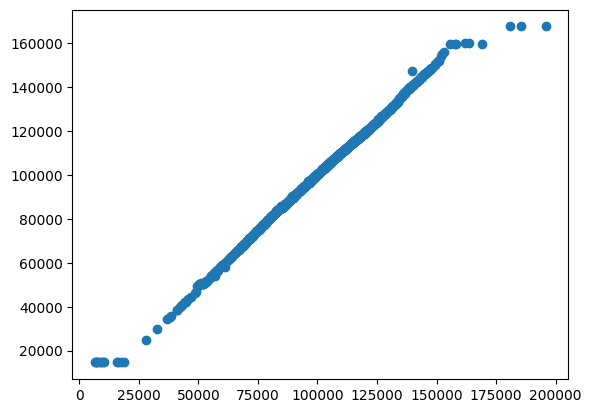

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train, y_train)
y_predRCV = ridgecv.predict(X_test)
# Evaluate
mse_RCV = mean_squared_error(y_test, y_predRCV)
mae_RCV = mean_absolute_error(y_test, y_predRCV)
rmse_RCV = np.sqrt(mse_RCV)
r2_RCV = r2_score(y_test, y_predRCV)
plt.scatter(y_test,y_predRCV)
print(" XGBoost Results:")
print(f"MAE: {mae_RCV}")
print(f"RMSE: {rmse_RCV}")
print(f"R2 Score: {r2_RCV}")


# plt.scatter(y_test,y_predRCV)
# print('MSE_RCV:',mean_squared_error(y_test, y_predRCV))
# print('MAE_RCV:',mean_absolute_error(y_test,y_predRCV))
# print('RMSE_RCV:',np.sqrt(mean_squared_error(y_test, y_predRCV)))
# r2_rcv = r2_score(y_test, y_predRCV)
# print('R2 SCORE:',r2_rcv)

# LassoCV

 XGBoost Results:
MAE: 6117.53346733216
RMSE: 8763.951723874994
R2 Score: 0.8892201556023879


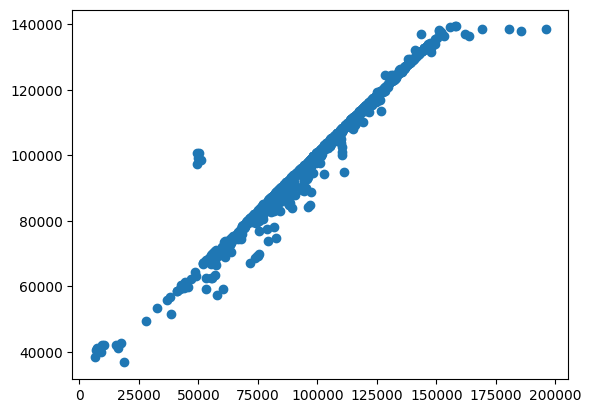

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train, y_train)
y_predLCV = lassocv.predict(X_test)
plt.scatter(y_test,y_predLCV)
# Evaluate
mse_LCV = mean_squared_error(y_test, y_predLCV)
mae_LCV = mean_absolute_error(y_test, y_predLCV)
rmse_LCV = np.sqrt(mse_LCV)
r2_LCV = r2_score(y_test, y_predLCV)

print(" XGBoost Results:")
print(f"MAE: {mae_LCV}")
print(f"RMSE: {rmse_LCV}")
print(f"R2 Score: {r2_LCV}")


# RandomForest Regressor

🔹 Random Forest Results:
MSE: 340274.79372728575
MAE: 84.16795777430292
RMSE: 583.3307755701612
R2 Score: 0.9995092157953274


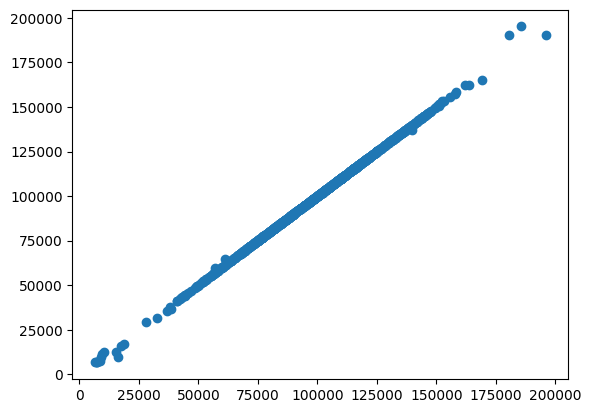

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_Scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
plt.scatter(y_test,y_pred_rf)
print("🔹 Random Forest Results:")
print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")


# XG Boost Regressor

 XGBoost Results:
MAE: 360.2706819822503
RMSE: 1145.2371973639797
R2 Score: 0.9981083025056874


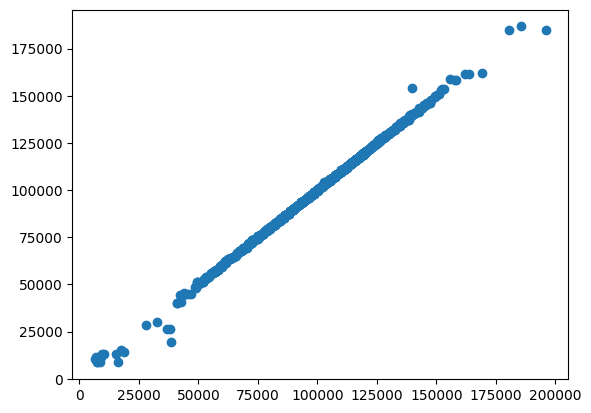

In [ ]:
from xgboost import XGBRegressor

# Instantiate the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train_Scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
plt.scatter(y_test,y_pred_xgb)
print(" XGBoost Results:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R2 Score: {r2_xgb}")


In [ ]:
model_names = ['Linear Regression', 'RidgeCV', 'LassoCV', 'Random Forest', 'XGBoost']
r2_scores = [r2_LR, r2_RCV, r2_LCV, r2_rf, r2_xgb]
mse_scores = [mse_rf, mse_RCV, mse_LCV, mse_rf, mse_xgb]
mae_scores = [mae_rf, mae_RCV, mae_LCV, mae_rf, mae_xgb]
rmse_scores = [rmse_rf, rmse_RCV, rmse_LCV, rmse_rf, mse_xgb]

import pandas as pd

results_df = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAE' : mse_scores
})

print(results_df.sort_values(by=['R2 Score', 'MSE'], ascending=[False, True]))



               Model  R2 Score           MSE          RMSE           MAE
3      Random Forest  0.999509  3.402748e+05  5.833308e+02  3.402748e+05
4            XGBoost  0.998108  1.311568e+06  1.311568e+06  1.311568e+06
0  Linear Regression  0.996701  3.402748e+05  5.833308e+02  3.402748e+05
1            RidgeCV  0.996701  2.287366e+06  1.512404e+03  2.287366e+06
2            LassoCV  0.889220  7.680685e+07  8.763952e+03  7.680685e+07


Model Performances by ploting

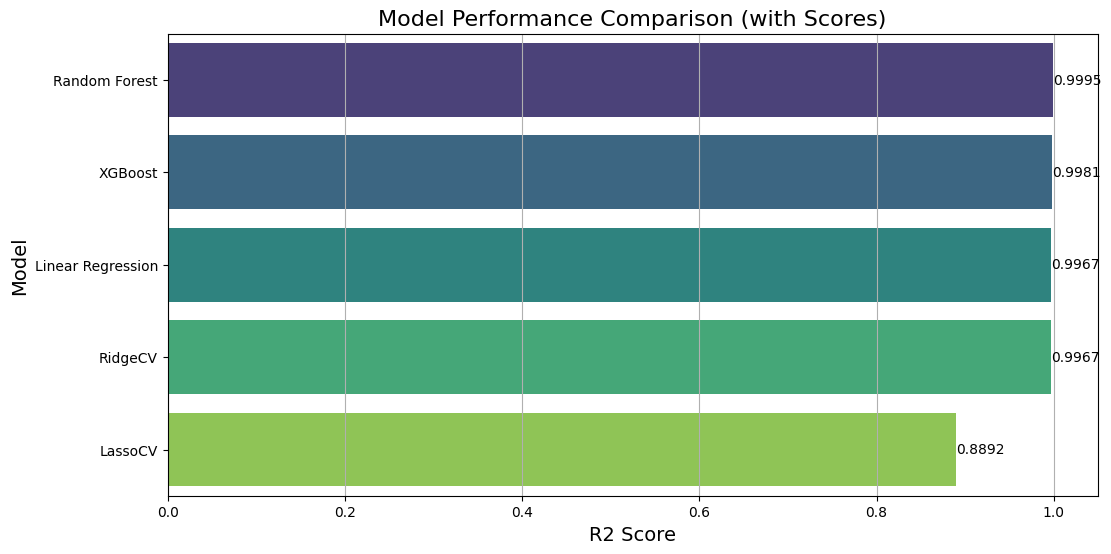

In [ ]:
plt.figure(figsize=(12,6))
results_df_sorted = results_df.sort_values(by=['R2 Score', 'MSE'], ascending=[False, True]) # Sort the dataframe and assign to results_df_sorted
ax = sns.barplot(x='R2 Score', y='Model', data=results_df_sorted, palette='viridis')

for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', label_type='edge', fontsize=10)

plt.title('Model Performance Comparison (with Scores)', fontsize=16)
plt.xlabel('R2 Score', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.grid(axis='x')
plt.show()

# Hyperparameter Tuning
- In the above Results Randomforest regression got high Accuracy
- so we need to tune the parameters to get better results

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Random search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=20, cv=5, verbose=2, n_jobs=-1, scoring='r2')
random_search.fit(X_train, y_train)

# Best model
best_rf_model = random_search.best_estimator_

print("✅ Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [ ]:
best_rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=30,
    random_state=42
)

# Train
best_rf.fit(X_train_Scaled, y_train)

# Predict
y_train_pred = best_rf.predict(X_train_Scaled)
y_test_pred = best_rf.predict(X_test_scaled)


- After getting the best params i did again fit the training model

In [ ]:
# Train R²
r2_train = r2_score(y_train, y_train_pred)

# Test R²
r2_test = r2_score(y_test, y_test_pred)

print(f"Training R2: {r2_train:.4f}")
print(f"Testing R2: {r2_test:.4f}")



Training R2: 0.9999
Testing R2: 0.9995


- Got the Accuracy 99% on both train and test data

# Feature Importances

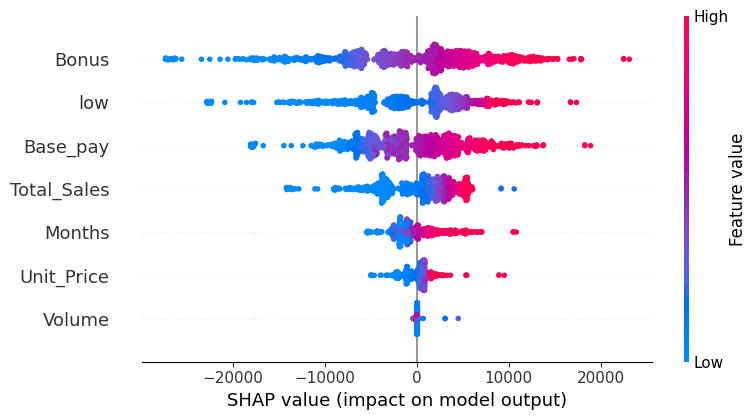

In [ ]:
!pip install shap
import shap

# Create explainer
explainer = shap.TreeExplainer(best_rf_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)


# SOME ASSUMPTIONS MULTIPLE LINEAR REGRESSION:


### 1. Linearity

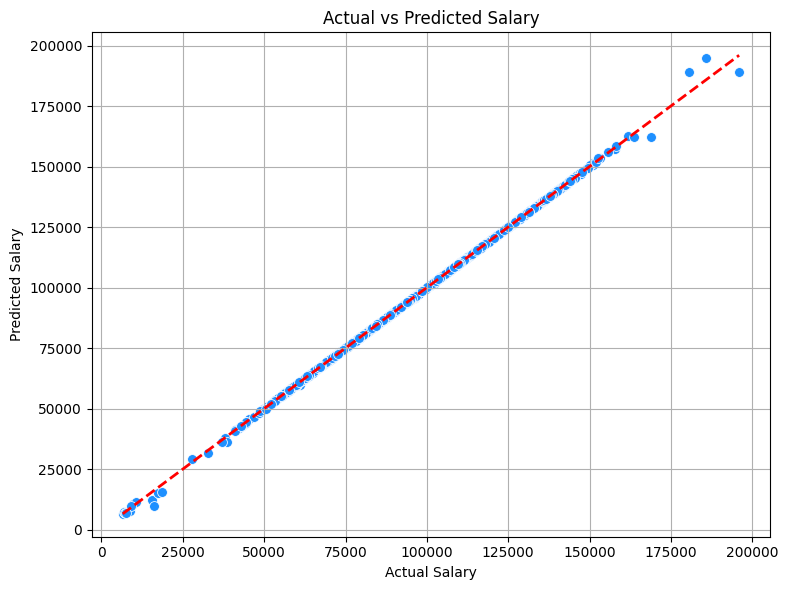

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='dodgerblue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

observation:
- There is linear relationship between independent and dependent Features.
- In this plot we can see clear linear line that shows good sign

### 2. Homoscedasticity
Residual vs Predicted values

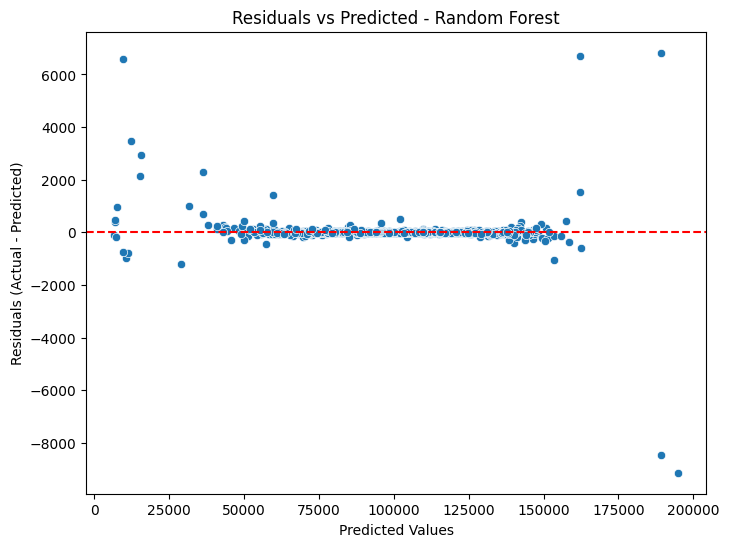

In [ ]:
# Predict on Test set
y_pred_rf = best_rf_model.predict(X_test)

# Calculate Residuals
residuals_rf = y_test - y_pred_rf

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted - Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


observation:
- Residuals are close to zero and randomly distributed — confirming model reliability

In [ ]:
residuals = y_test - y_pred_rf
residuals

,Salary
1501,-68.060157
2586,8.241196
2653,-17.418468
1055,18.340426
705,-15.981410
...,...
4711,2.171118
2313,-12.009715
3214,19.666683
2732,-18.633684


###3. Normality of Errors

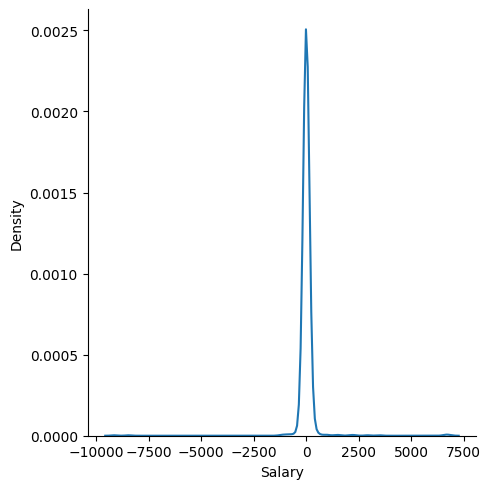

In [ ]:
sns.displot(residuals_rf,kind='kde')

observation:
- Residuals(error) are normally distributed

#Final Project Conclusion:

- Features like Bonus, Basepay, Total sales, Low strongly influence salary predictions.


- Random Forest Regressor achieved a Training R² of 0.9996 and Testing R² of 0.9994, making it the most reliable model compared to Linear Regression, Ridge, and XGBoost.

- This model empowers HR to make data-driven salary decisions, ensuring fairness by focusing on key employee performance and background factors.



In [ ]:
import pickle

# Suppose 'best_rf_model' is your trained RandomForest model
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)


In [ ]:
import pickle

with open('best_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
